# Using the class Table() for data analysis

Say we have previously renamed the EPW files with rename_epw_files(), and the EPWs we currently have are:

- United-Kingdom_Aberdeen_Present

- United-Kingdom_London_Present

We also have transformed the IDF file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220.idf, and the IDFs we currently have are:

- TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X.idf

- TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X.idf

- TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_2[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X.idf

- TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_2[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X.idf

- TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X.idf

- TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X.idf

Next, we simulate these files with runEp(), so the CSVs we get are:

In [1]:
import os
print(*[i for i in os.listdir() if i.endswith('.csv') and 'TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220' in i], sep='\n')

TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv
TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_London_Present.csv
TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv
TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_London_Present.csv
TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_2[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv
TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_2[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_London_Present.csv
TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT 

So now, let's use the class Table() to analyse the data.

## 1. Getting the full dataset of simulation results

In [2]:
from accim.data.data_postprocessing import Table
dataset_hourly = Table(
    #datasets=list #Since we are not specifying any list, it will use all available CSVs in the folder
    source_frequency='hourly', # This lets accim know which is the frequency of the input CSVs. Input CSVs with multiple frequencies are also allowed. It can be 'hourly', 'daily', 'monthly' and 'runperiod'. It can also be 'timestep' but might generate errors.
    frequency='hourly', # If 'daily', accim will aggregate the rows in days. It can be 'hourly', 'daily', 'monthly' and 'runperiod'. It can also be 'timestep' but might generate errors.
    frequency_agg_func='sum', #this makes the sum or average when aggregating in days, months or runperiod; since the original CSV frequency is in hour, it won't make any aeffect
    standard_outputs=True, 
    level=['building'], # A list containing the strings 'block' and/or 'building'. For instance, if ['block', 'building'], accim will generate new columns to sum up or average in blocks and building level.
    level_agg_func=['sum', 'mean'], # A list containing the strings 'sum' and/or 'mean'. For instance, if ['sum', 'mean'], accim will generate the new columns explained in the level argument by summing and averaging.
    level_excluded_zones=[],
    split_epw_names=True, #to split EPW names based on the pattern Country_City_RCPscenario-Year
)

Input data frequency in file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_London_Present.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_London_Present.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel_o

A Table object has been created, which includes a number of accessible variables. The most important is the Pandas Dataframe created from the CSVs, which can be accessed with .df (in this case, dataset_hourly.df)

In [3]:
dataset_hourly.df

,Source,Model,ComfStand,CAT,ComfMod,HVACmode,VentCtrl,VSToffset,MinOToffset,MaxWindSpeed,...,Building_Total_Total Energy Demand (kWh/m2) (summed),Building_Total_Total Energy Demand (kWh/m2) (mean),Building_Total_Total Energy Consumption (kWh/m2) (summed),Building_Total_Total Energy Consumption (kWh/m2) (mean),Building_Total_Zone Air Volume (m3) (summed),Building_Total_Zone Floor Area (m2) (summed),Building_Total_PMV (summed),Building_Total_PMV (mean),Building_Total_PPD (%) (summed),Building_Total_PPD (%) (mean)
0,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_1,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,...,0.036738,0.009185,0.030576,0.007644,232.0401,66.2971,0.0,NaN,0.0,NaN
1,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_1,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,...,0.040240,0.010060,0.034616,0.008654,232.0401,66.2971,0.0,NaN,0.0,NaN
2,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_1,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,...,0.042701,0.010675,0.037389,0.009347,232.0401,66.2971,0.0,NaN,0.0,NaN
3,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_1,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,...,0.044282,0.011071,0.039079,0.009770,232.0401,66.2971,0.0,NaN,0.0,NaN
4,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_1,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,...,0.045109,0.011277,0.039927,0.009982,232.0401,66.2971,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,...,0.011349,0.002837,0.007941,0.001985,232.0401,66.2971,0.0,NaN,0.0,NaN
105116,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,...,0.011955,0.002989,0.008373,0.002093,232.0401,66.2971,0.0,NaN,0.0,NaN
105117,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,...,0.012974,0.003243,0.009094,0.002273,232.0401,66.2971,0.0,NaN,0.0,NaN
105118,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,...,0.015072,0.003768,0.010571,0.002643,232.0401,66.2971,0.0,NaN,0.0,NaN


In [4]:
dataset_hourly.df.shape

(105120, 119)

Also, you can see the block list that has been extracted from the zones in the CSV columns, as well as the zones with heating or cooling energy consumption, and the occupied zones:

In [5]:
dataset_hourly.block_list

['BLOCK1']

In [6]:
dataset_hourly.hvac_zone_list

['BLOCK1:ZONE2', 'BLOCK1:ZONE1']

In [7]:
dataset_hourly.occupied_zone_list

['BLOCK1:ZONE2', 'BLOCK1:ZONE1']

In case of lots of CSVs, using the Table class would mean gathering the CSVs to make the Dataframe each time, and it might be very time-consuming. Therefore, the CSVs can be concatenated into a single CSV and store in the same folder with the argument concatenated_csv_name. Afterwards, that concatenated CSV can be read using the argument source_concatenated_csv_filepath each time a Table class object is created.

In [8]:
concatenated_csvname = 'notebook_example'
dataset_hourly_indirect = Table(
    #datasets=list #Since we are not specifying any list, it will use all available CSVs in the folder
    source_frequency='hourly', # This lets accim know which is the frequency of the input CSVs. Input CSVs with multiple frequencies are also allowed. It can be 'hourly', 'daily', 'monthly' and 'runperiod'. It can also be 'timestep' but might generate errors.
    frequency='hourly', # If 'daily', accim will aggregate the rows in days. It can be 'hourly', 'daily', 'monthly' and 'runperiod'. It can also be 'timestep' but might generate errors.
    frequency_agg_func='sum', #this makes the sum or average when aggregating in days, months or runperiod; since the original CSV frequency is in hour, it won't make any aeffect
    standard_outputs=True, 
    concatenated_csv_name=concatenated_csvname #Useful when working with large datasets. It saves the output dataset to a CSV file, so you don't need to re-do some work. Afterwards, it can be imported with source_concatenated_csv_filepath argument.
    # All other arguments won't have any effect on the output. This is only to store the csv at early stage. Datawrangling will be performed later.
    
)

Input data frequency in file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_London_Present.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_London_Present.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel_o

We just generated a CSV, whose name begins with 'notebook example', specifies the input data and ends with 'CSVconcatenated'. If there is some row with NaN, it will be generated another CSV reporting this, but ending with 'Rows_with_NaNs'. We should be able to see it below:

In [9]:
import os
os.listdir()

['.ipynb_checkpoints',
 'notebook_example[srcfreq-hourly[freq-hourly[frequency_agg_func-sum[standard_outputs-True[CSVconcatenated.csv',
 'TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv',
 'TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_London_Present.csv',
 'TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv',
 'TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_1[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_London_Present.csv',
 'TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_2[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv',
 'TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_I

Now, let's continue working with the CSVconcatenated we have generated:

In [10]:
dataset_hourly_indirect = Table(
    source_concatenated_csv_filepath='notebook_example[srcfreq-hourly[freq-hourly[frequency_agg_func-sum[standard_outputs-True[CSVconcatenated.csv',
    # source_frequency='hourly', # The new source frequency is the previous already computed frequency, since we have already aggregated rows based on the previous frequency. Therefore, there is no need to specify this argument.
    # 3 arguments below have been previously specified, and in fact, are stored at the concatenated CSV filename. So you don't need to specify these again.
    # frequency='hourly',
    # frequency_agg_func='sum',
    # standard_outputs=True,
    level=['building'],
    level_agg_func=['sum', 'mean'],
    level_excluded_zones=[],
    split_epw_names=True, #to split EPW names based on the format Country_City_RCPscenario-YEar
    
)

No zones have been excluded from level computations.
All CSVs are for present scenario.


In [11]:
dataset_hourly_indirect.df.shape

(105120, 119)

You can see we have obtained the same full dataset. Now, let's delete the concatenated CSV file to save some space.

In [12]:
for i in os.listdir():
    if concatenated_csvname in i:
        os.remove(i)

## 2. Filtering results

We have used any of the 2 methods to obtain the full dataset of simulation results.

At this point, we should have decided what table or graph we intend to make, and therefore we should know what data we are going to show in it. In this case, we want to make a figure with different subplots, showing the different ComfMod values on the rows and the different EPW_City_or_subcountry values on the columns, and in each subplot, a scatter plot with the indoor operative temperature and adaptive heating and cooling setpoints on the y main axis (left spine), and on the secondary y axis, 2 different spines, one of them to show the heating and cooling energy demand, and the other one the air changes. However, let's say we just want to see the subplots for Category CA_3.

In [13]:
print(*dataset_hourly.df.columns, sep='\n')

Source
Model
ComfStand
CAT
ComfMod
HVACmode
VentCtrl
VSToffset
MinOToffset
MaxWindSpeed
ASTtol
NameSuffix
EPW
Count
EPW_Country_name
EPW_City_or_subcountry
EPW_Scenario-Year
EPW_Scenario
EPW_Year
Date/time
Month/day
Month
Day
Hour
Minute
Second
Site Outdoor Air Drybulb Temperature (°C)
Site Outdoor Air Relative Humidity (%)
Site Wind Speed (m/s)
Comfort Temperature (°C)
Adaptive Cooling Setpoint Temperature (°C)
Adaptive Heating Setpoint Temperature (°C)
Adaptive Cooling Setpoint Temperature_No Tolerance (°C)
Adaptive Heating Setpoint Temperature_No Tolerance (°C)
Ventilation Setpoint Temperature (°C)
Minimum Outdoor Temperature for ventilation (°C)
BLOCK1:ZONE2_Comfortable Hours_No Applicability (h)
BLOCK1:ZONE1_Comfortable Hours_No Applicability (h)
BLOCK1:ZONE2_Comfortable Hours_Applicability (h)
BLOCK1:ZONE1_Comfortable Hours_Applicability (h)
BLOCK1:ZONE2_Discomfortable Applicable Hot Hours (h)
BLOCK1:ZONE1_Discomfortable Applicable Hot Hours (h)
BLOCK1:ZONE2_Discomfortable Applic

Now, let's extract the data we are really interested in. For this, we can use the method called format_table():

In [14]:
dataset_hourly.format_table(
    type_of_table='custom', # Used to choose some predefined tables. It can be 'energy demand', 'comfort hours', 'temperature', 'all' or 'custom'
    custom_cols=[ #if type_of_table is 'custom', custom_cols is used to filter the desired columns to keep
        'Adaptive Cooling Setpoint Temperature_No Tolerance (°C)',
        'Adaptive Heating Setpoint Temperature_No Tolerance (°C)',
        'Building_Total_Zone Operative Temperature (°C) (mean)',
        'BLOCK1:ZONE2_EN16798-1 Running mean outdoor temperature (°C)',
        'Building_Total_Cooling Energy Demand (kWh/m2) (summed)',
        'Building_Total_Heating Energy Demand (kWh/m2) (summed)',
        'Building_Total_AFN Zone Infiltration Air Change Rate (ach) (summed)'
    ]
)

So, we have already filtered the columns we wanted. Let's look at the result:

In [15]:
dataset_hourly.df

,Date/time,Model,ComfStand,CAT,ComfMod,HVACmode,VentCtrl,VSToffset,MinOToffset,MaxWindSpeed,...,EPW_Scenario-Year,EPW_Scenario,EPW_Year,Adaptive Cooling Setpoint Temperature_No Tolerance (°C),Adaptive Heating Setpoint Temperature_No Tolerance (°C),Building_Total_Zone Operative Temperature (°C) (mean),BLOCK1:ZONE2_EN16798-1 Running mean outdoor temperature (°C),Building_Total_Cooling Energy Demand (kWh/m2) (summed),Building_Total_Heating Energy Demand (kWh/m2) (summed),Building_Total_AFN Zone Infiltration Air Change Rate (ach) (summed)
0,01/01 01:00:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_1,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,25.0,21.0,21.075965,-1.071071,0.0,0.036738,0.217716
1,01/01 02:00:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_1,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,25.0,21.0,21.060730,-1.071071,0.0,0.040240,0.229646
2,01/01 03:00:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_1,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,25.0,21.0,21.061641,-1.071071,0.0,0.042701,0.238609
3,01/01 04:00:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_1,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,25.0,21.0,21.068896,-1.071071,0.0,0.044282,0.242288
4,01/01 05:00:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_1,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,25.0,21.0,21.078253,-1.071071,0.0,0.045109,0.243261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,12/31 20:00:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,26.1,17.1,17.171267,7.543148,0.0,0.011349,0.180364
105116,12/31 21:00:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,26.1,17.1,17.176058,7.543148,0.0,0.011955,0.175023
105117,12/31 22:00:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,26.1,17.1,17.178160,7.543148,0.0,0.012974,0.191868
105118,12/31 23:00:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,26.1,17.1,17.176237,7.543148,0.0,0.015072,0.255266


As you can see, the number of columns have been reduced to 29, which are 22 columns for the index and categorical data, and the 7 columns we filtered.

## 3. Making graphs

We will make the figure with scatter_plot(), however it needs some input data we will previously generate with generate_fig_data().

### 3.1 Scatter plot:

As said above, we first need to generate the dataset lists with generate_fig_data():

And finally we can plot the figure:

The number of rows and the list of these is going to be:
No. of rows = 2
List of rows:
CM_0[CA_3
CM_3[CA_3
Do you want to rename the rows? [y/n]: y
Please enter the new name for CM_0[CA_3: Static setpoints
Please enter the new name for CM_3[CA_3: Adaptive setpoints
The renamed rows are going to be:
Static setpoints
Adaptive setpoints
The number of columns and the list of these is going to be:
No. of columns = 2
List of columns:
Aberdeen
London
Column names will be the subplot titles. Do you want to rename them? [y/n]: n


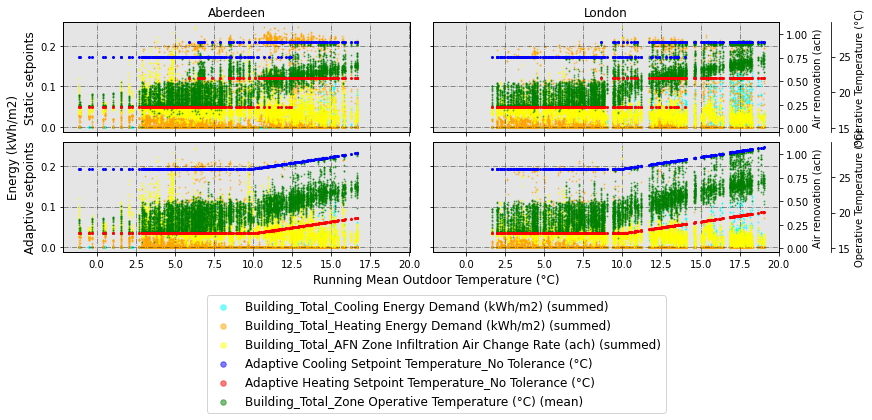

In [16]:
dataset_hourly.scatter_plot(
    vars_to_gather_rows=['ComfMod', 'CAT'], # variables to gather in rows of subplots
    vars_to_gather_cols=['EPW_City_or_subcountry'],# variables to gather in columns of subplots
    detailed_rows=['CM_0[CA_3', 'CM_3[CA_3'], #we only want to see those combinations
    data_on_x_axis='BLOCK1:ZONE2_EN16798-1 Running mean outdoor temperature (°C)', #column name (string) for the data on x axis

    data_on_y_main_axis=[ # similarly to above, a list including the name of the secondary y-axis and the column names you want to plot in it
        [
            'Energy (kWh/m2)',
            [
                'Building_Total_Cooling Energy Demand (kWh/m2) (summed)',
                'Building_Total_Heating Energy Demand (kWh/m2) (summed)',
            ]
        ],
    ],
    data_on_y_sec_axis=[ #list which includes the name of the axis on the first place, and then in the second place, a list which includes the column names you want to plot
        [
            'Air renovation (ach)',
            [
                'Building_Total_AFN Zone Infiltration Air Change Rate (ach) (summed)'
            ]
        ],
        [
            'Operative Temperature (°C)',
            [
                'Adaptive Cooling Setpoint Temperature_No Tolerance (°C)',
                'Adaptive Heating Setpoint Temperature_No Tolerance (°C)',
                'Building_Total_Zone Operative Temperature (°C) (mean)',
            ]
        ],
    ],

    colorlist_y_main_axis=[
        [
            'Energy (kWh/m2)',
            [
                'cyan',
                'orange',
            ]
        ],

    ],
    colorlist_y_sec_axis=[
        [
            'Air renovation (ach)',
            [
                'yellow'
            ]
        ],
        [
            'Operative Temperature (°C)',
            [
                'b',
                'r',
                'g',
            ]
        ],
    ],
    
    supxlabel='Running Mean Outdoor Temperature (°C)', # data label on x axis
    figname=f'WIP_scatterplot_RMOT',
    figsize=6,
    ratio_height_to_width=0.33,
    confirm_graph=True
)


### 3.2 Adaptive vs Static data scatter plot:

A very specific type of scatter plot can be done to show the relationship between data related to adaptive and static setpoint temperatures. In this case, you would need to use the following arguments in generate_fig_data: adap_vs_stat_data_y_main, baseline and colorlist_adap_vs_stat_data; finally, you would need to use the scatter_plot_adap_vs_stat() function.

The number of rows and the list of these is going to be:
No. of rows = 2
List of rows:
Aberdeen
London
Do you want to rename the rows? [y/n]: n
The number of columns and the list of these is going to be:
No. of columns = 5
List of columns:
CM_0[CA_2
CM_0[CA_3
CM_3[CA_1
CM_3[CA_2
CM_3[CA_3
Column names will be the subplot titles. Do you want to rename them? [y/n]: n


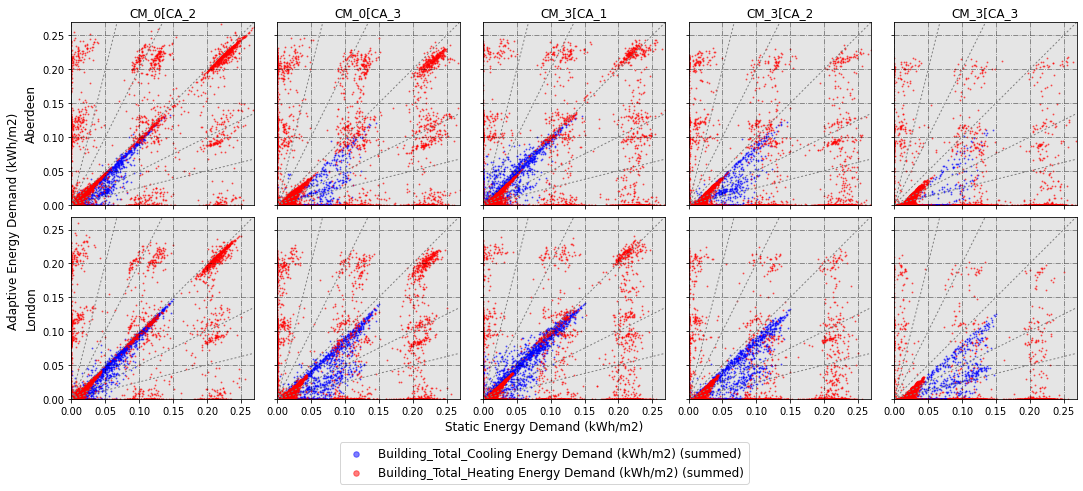

In [17]:
dataset_hourly.scatter_plot_with_baseline(
    vars_to_gather_rows=['EPW_City_or_subcountry'], #you can enter multiple variables, for example: ['EPW_City_or_subcountry', 'EPW_Scenario-Year']
    vars_to_gather_cols=['ComfMod', 'CAT'], #you can enter multiple variables
    data_on_y_axis_baseline_plot=[ # in this case, you only need to specify a list which includes the data columns you want to plot
        'Building_Total_Cooling Energy Demand (kWh/m2) (summed)',
        'Building_Total_Heating Energy Demand (kWh/m2) (summed)',
    ],
    baseline='CM_0[CA_1', # the baseline needs to be in vars_to_gather_cols, and it's going to be shown on x axis. Given the variables we have simulated, you can choose between 'CM_0[CA_1', 'CM_0[CA_2', 'CM_0[CA_3', 'CM_3[CA_1', 'CM_3[CA_2' and 'CM_3[CA_3'
    colorlist_baseline_plot_data=[
        'b',
        'r',
    ],
    
    supxlabel='Static Energy Demand (kWh/m2)',
    supylabel='Adaptive Energy Demand (kWh/m2)',
    figname='WIP_scatterplot_adap_vs_stat',
    figsize=3,
    confirm_graph=True
)

Now, let's delete all the images we have created to save some space:

In [18]:
for i in os.listdir():
    if i.endswith('.png'):
        os.remove(i)

## 4. Making tables

Now, let's make some tables comparing results. For example, let's make a table to show monthly values of heating and cooling energy demand. First, let's generate the dataset with monthly frequency and let's filter the columns to keep heating and cooling demand at building level.

In [1]:
from accim.data.data_postprocessing import Table
dataset_monthly = Table(
    #datasets=list Since we are not specifying any list, it will use all available CSVs in the folder
    source_frequency='hourly',
    frequency='monthly',
    frequency_agg_func='sum', #this makes the sum or average when aggregating in days, months or runperiod; since the original CSV frequency is in hour, it won't make any aeffect
    standard_outputs=True,
    level=['building'],
    level_agg_func=['sum'],
    level_excluded_zones=[],
    split_epw_names=True, #to split EPW names based on the format Country_City_RCPscenario-YEar
)

dataset_monthly.format_table(
    type_of_table='custom',
    custom_cols=[
        'Building_Total_Cooling Energy Demand (kWh/m2) (summed)',
        'Building_Total_Heating Energy Demand (kWh/m2) (summed)',
    ]
)

No zones have been excluded from level computations.
All CSVs are for present scenario.


Now, let's make the table we are looking for. You can choose 'unstack' or 'pivot' as a reshaping method (remember that we are actually working with Pandas Dataframes). Let's go with unstack, and we are going to compare the baseline shown below with all gathered variables

In [2]:
dataset_monthly.wrangled_table(
    reshaping='unstack', #can be 'unstack' or 'pivot'
    vars_to_gather=['ComfMod', 'CAT'],
    vars_to_keep=['EPW_City_or_subcountry'],
    baseline='CM_0[CA_1',
    comparison_mode=['baseline compared to others'], #can be 'baseline compared to others' or 'others compared to baseline'
    comparison_cols=['relative', 'absolute'] #'relative' to show the difference as a percentage, 'absolute' to show the difference by subtracting
)

In [3]:
dataset_monthly.wrangled_df_unstacked

Building_Total_Cooling Energy Demand (kWh/m2) (summed)  \
                                                                                           CM_0[CA_1   
Date/time        Month EPW_City_or_subcountry                                                          
 01/01  01:00:00 01    Aberdeen                                                             0.00       
                       London                                                               0.12       
 02/01  01:00:00 02    Aberdeen                                                             0.29       
                       London                                                               0.43       
 03/01  01:00:00 03    Aberdeen                                                             1.39       
                       London                                                               1.34       
 04/01  01:00:00 04    Aberdeen                                                             3.38       
                       London                                                               6.95       
 05/01  01:00:00 05    Aberdeen                                                             8.78       
                       London                                                              14.37       
 06/01  01:00:00 06    Aberdeen                                                            12.16       
                       London                                                              16.10       
 07/01  01:00:00 07    Aberdeen                                                            12.15       
                       London                                                              25.21       
 08/01  01:00:00 08    Aberdeen                                                            11.45       
                       London                                                              22.48       
 09/01  01:00:00 09    Aberdeen                                                             3.24       
                       London                                                              10.22       
 10/01  01:00:00 10    Aberdeen                                                             0.27       
                       London                                                               3.85       
 11/01  01:00:00 11    Aberdeen                                                             0.05       
                       London                                                               0.40       
 12/01  01:00:00 12    Aberdeen                                                             0.00       
                       London                                                               0.00       

                                                                             \
                                              CM_3[CA_1 CM_0[CA_2 CM_3[CA_2   
Date/time        Month EPW_City_or_subcountry                                 
 01/01  01:00:00 01    Aberdeen                    0.00      0.00      0.00   
                       London                      0.00      0.04      0.00   
 02/01  01:00:00 02    Aberdeen                    0.26      0.14      0.00   
                       London                      0.09      0.07      0.00   
 03/01  01:00:00 03    Aberdeen                    1.06      0.71      0.26   
                       London                      0.95      0.82      0.06   
 04/01  01:00:00 04    Aberdeen                    2.72      1.92      0.79   
                       London                      6.75      5.65      2.76   
 05/01  01:00:00 05    Aberdeen                    7.24      5.67      1.67   
                       London                     14.89     11.25      8.51   
 06/01  01:00:00 06    Aberdeen                   11.19      8.94      4.83   
                       London                     16.39     14.03     10.63   
 07/01  01:00:00 07    Aberdeen                   12

Let's make a different dataset to work with runperiod frequency.

In [4]:
from accim.data.data_postprocessing import Table
dataset_runperiod = Table(
    #datasets=list Since we are not specifying any list, it will use all available CSVs in the folder
    source_frequency='hourly',
    frequency='runperiod',
    frequency_agg_func='sum', #this makes the sum or average when aggregating in days, months or runperiod; since the original CSV frequency is in hour, it won't make any aeffect
    standard_outputs=True,
    level=['building'],
    level_agg_func=['sum'],
    level_excluded_zones=[],
    #match_cities=bool Only used when EPW file has NOT been previously renamed
    #manage_epw_names=bool Only used when EPW file has NOT been previously renamed
    split_epw_names=True, #to split EPW names based on the format Country_City_RCPscenario-YEar
)

dataset_runperiod.format_table(
    type_of_table='custom',
    custom_cols=[
        'Building_Total_Cooling Energy Demand (kWh/m2) (summed)',
        'Building_Total_Heating Energy Demand (kWh/m2) (summed)',
    ]
)


No zones have been excluded from level computations.
All CSVs are for present scenario.


In this case, we are going to use the 'pivot' reshaping option:

In [5]:
dataset_runperiod.wrangled_table(
    reshaping='pivot',
    vars_to_gather=['ComfMod', 'CAT'],
    baseline='CM_0[CA_1',
    comparison_mode=['baseline compared to others'],
    comparison_cols=['relative', 'absolute']
)

C:\users\sanga\appdata\local\programs\python\python39\lib\site-packages\accim\data\data_postprocessing.py:1611: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['col_to_pivot'] = 'temp'
C:\users\sanga\appdata\local\programs\python\python39\lib\site-packages\accim\data\data_postprocessing.py:1624: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['col_to_pivot'] = wrangled_df_pivoted['col_to_pivot']


In [6]:
dataset_runperiod.wrangled_df_pivoted

col_to_pivot,CM_0[CA_1,CM_0[CA_2,CM_0[CA_3,CM_3[CA_1,CM_3[CA_2,CM_3[CA_3,1-(CM_0[CA_1/CM_3[CA_2),CM_3[CA_2 - CM_0[CA_1,1-(CM_0[CA_1/CM_3[CA_1),CM_3[CA_1 - CM_0[CA_1,1-(CM_0[CA_1/CM_0[CA_2),CM_0[CA_2 - CM_0[CA_1,1-(CM_0[CA_1/CM_3[CA_3),CM_3[CA_3 - CM_0[CA_1,1-(CM_0[CA_1/CM_0[CA_3),CM_0[CA_3 - CM_0[CA_1
Building_Total_Cooling Energy Demand (kWh/m2) (summed),154.66,124.24,66.51,141.86,68.41,26.77,-1.26,-86.24,-0.09,-12.80,-0.24,-30.42,-4.78,-127.89,-1.33,-88.14
Building_Total_Heating Energy Demand (kWh/m2) (summed),680.07,688.99,547.22,413.73,274.22,149.52,-1.48,-405.85,-0.64,-266.33,0.01,8.92,-3.55,-530.55,-0.24,-132.84


Again, please remember we are working with Pandas Dataframe objects. That means we can modify the df we have generated. For instance, we can simplify it by removing all rows except those with 'CA_3' in the Category column, as shown below.

In [7]:
dataset_runperiod.df = dataset_runperiod.df[
    dataset_runperiod.df['CAT'].isin(['CA_3'])
]

In [8]:
dataset_runperiod.df

,Model,ComfStand,CAT,ComfMod,HVACmode,VentCtrl,VSToffset,MinOToffset,MaxWindSpeed,ASTtol,NameSuffix,EPW,Source,EPW_Country_name,EPW_City_or_subcountry,EPW_Scenario-Year,EPW_Scenario,EPW_Year,Building_Total_Cooling Energy Demand (kWh/m2) (summed),Building_Total_Heating Energy Demand (kWh/m2) (summed)
8,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,AT_0.1,NS_X,United-Kingdom_Aberdeen_Present,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,United-Kingdom,Aberdeen,Present,Present,Present,13.574438,318.977783
9,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,AT_0.1,NS_X,United-Kingdom_London_Present,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,United-Kingdom,London,Present,Present,Present,52.938830,228.246073
10,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,AT_0.1,NS_X,United-Kingdom_Aberdeen_Present,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,United-Kingdom,Aberdeen,Present,Present,Present,5.687532,92.602457
11,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,AT_0.1,NS_X,United-Kingdom_London_Present,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,United-Kingdom,London,Present,Present,Present,21.084511,56.917599


And now we could make a similar pivoted table as above, but simplified to show only CA_3:

In [11]:
dataset_runperiod.wrangled_table(
    reshaping='pivot',
    vars_to_gather=['ComfMod'],
    baseline='CM_0',
    comparison_mode=['baseline compared to others'],
    comparison_cols=['relative', 'absolute']
)

In [12]:
dataset_runperiod.wrangled_df_pivoted

col_to_pivot,CM_0,CM_3,1-(CM_0/CM_3),CM_3 - CM_0
Building_Total_Cooling Energy Demand (kWh/m2) (summed),66.51,26.77,-1.48,-39.74
Building_Total_Heating Energy Demand (kWh/m2) (summed),547.22,149.52,-2.66,-397.70


Another method to achieve this is generating a different Table object, only reading the CSV files with CA_3 in it name:

In [13]:
import os
from accim.data.data_postprocessing import Table

dataset = [i for i in os.listdir() if i.endswith('.csv') and 'CA_3' in i]

dataset_runperiod_simplified_1 = Table(
    datasets=dataset,
    source_frequency='hourly',
    frequency='runperiod',
    frequency_agg_func='sum',
    # this makes the sum or average when aggregating in days, months or runperiod; since the original CSV frequency is in hour, it won't make any aeffect
    standard_outputs=True,
    level=['building'],
    level_agg_func=['sum'],
    level_excluded_zones=[],
    split_epw_names=True,  # to split EPW names based on the format Country_City_RCPscenario-YEar
)

dataset_runperiod_simplified_1.format_table(
    type_of_table='custom',
    custom_cols=[
        'Building_Total_Cooling Energy Demand (kWh/m2) (summed)',
        'Building_Total_Heating Energy Demand (kWh/m2) (summed)',
    ]
)

dataset_runperiod_simplified_1.wrangled_table(
    reshaping='pivot',
    vars_to_gather=['ComfMod'],
    baseline='CM_0',
    comparison_mode=['baseline compared to others'],
    comparison_cols=['relative', 'absolute']
)




No zones have been excluded from level computations.
All CSVs are for present scenario.


C:\users\sanga\appdata\local\programs\python\python39\lib\site-packages\accim\data\data_postprocessing.py:1611: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['col_to_pivot'] = 'temp'
C:\users\sanga\appdata\local\programs\python\python39\lib\site-packages\accim\data\data_postprocessing.py:1624: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['col_to_pivot'] = wrangled_df_pivoted['col_to_pivot']


You can see below the resulting table is exactly the same:

In [14]:
dataset_runperiod_simplified_1.wrangled_df_pivoted

col_to_pivot,CM_0,CM_3,1-(CM_0/CM_3),CM_3 - CM_0
Building_Total_Cooling Energy Demand (kWh/m2) (summed),66.51,26.77,-1.48,-39.74
Building_Total_Heating Energy Demand (kWh/m2) (summed),547.22,149.52,-2.66,-397.70


You can finally export the table as xlsx format:

In [15]:
dataset_runperiod_simplified_1.wrangled_df_pivoted.to_excel('building_energy_demand.xlsx')

Let's delete it now:

In [16]:
for i in os.listdir():
    if i.endswith('.xlsx'):
        os.remove(i)